In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
with open('wine_names.txt', 'r') as G:
    print(G.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

## Import the data

In [3]:
data=pd.read_csv('wine.txt',header=None)
data.columns=['class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']
#data= data.drop('class', 1)
#data= data.drop(columns=[0])
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


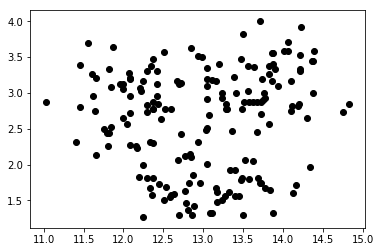

In [4]:
df=data[['Ash','Malic_acid','Alcalinity_of_ash','Nonflavanoid_phenols','Total_phenols','Alcohol','OD280/OD315_of_diluted_wines','Proanthocyanins','Magnesium']]
#visualize data
plt.scatter(df['Alcohol'],df['OD280/OD315_of_diluted_wines'],c='black')
plt.show()

### Creating the clustering machine for two attributes:

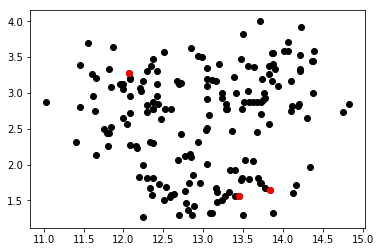

In [5]:
k=3
Centroids = (df.sample(n=k))
#Let us look at a scatterplot furnished with the intially chosen centroids
plt.scatter(df['Alcohol'],df['OD280/OD315_of_diluted_wines'],c='black')
plt.scatter(Centroids['Alcohol'],Centroids['OD280/OD315_of_diluted_wines'],c='red')
plt.show()

In [6]:
j=0
diff=1
while(diff!=0):
    df_upd=df
    i=1
    for idx_1,vec_1 in Centroids.iterrows():
        ED=[]
        for idx_2,vec_2 in df_upd.iterrows():
            d1=(vec_1["Alcohol"]-vec_2["Alcohol"])**2
            d2=(vec_1["OD280/OD315_of_diluted_wines"]-vec_2["OD280/OD315_of_diluted_wines"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["OD280/OD315_of_diluted_wines","Alcohol"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['OD280/OD315_of_diluted_wines'] - Centroids['OD280/OD315_of_diluted_wines']).sum() + (Centroids_new['Alcohol'] - Centroids['Alcohol']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["OD280/OD315_of_diluted_wines","Alcohol"]]



C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-0.11399532384979016
-0.10306408625886565
-0.1209845799871685
0.006186698812374214
0.0


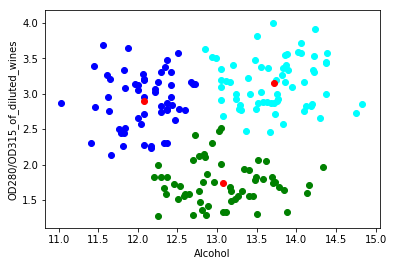

In [7]:
color=['blue','green','cyan']
for p in range(k):
    data=df[df["Cluster"]==p+1]
    plt.scatter(data["Alcohol"],data["OD280/OD315_of_diluted_wines"],c=color[p])
plt.scatter(Centroids["Alcohol"],Centroids["OD280/OD315_of_diluted_wines"],c='red')
plt.xlabel('Alcohol')
plt.ylabel('OD280/OD315_of_diluted_wines')
plt.show()

### Creating the clustering machine for 3 attributes:

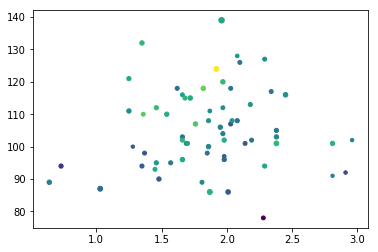

In [8]:
df1=data[['Ash','Malic_acid','Alcalinity_of_ash','Nonflavanoid_phenols','Total_phenols','Alcohol','OD280/OD315_of_diluted_wines','Proanthocyanins','Magnesium']]
#visualize data
plt.scatter(df1['Proanthocyanins'],df1['Magnesium'],df1['Alcalinity_of_ash'],df1['Ash'])
plt.show()

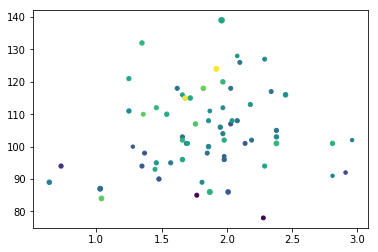

In [13]:
k=3
Centroids = (df.sample(n=k))
#Let us look at a scatterplot furnished with the intially chosen centroids
plt.scatter(df1['Proanthocyanins'],df1['Magnesium'],df1['Alcalinity_of_ash'],df1['Ash'])
plt.scatter(Centroids['Proanthocyanins'],Centroids['Magnesium'],Centroids['Alcalinity_of_ash'],Centroids['Ash'])
plt.show()

In [10]:
j=0
diff=1
while(diff!=0):
    df_upd=df
    i=1
    for idx_1,vec_1 in Centroids.iterrows():
        ED=[]
        for idx_2,vec_2 in df_upd.iterrows():
            d1=(vec_1["Alcohol"]-vec_2["Alcohol"])**2
            d2=(vec_1["OD280/OD315_of_diluted_wines"]-vec_2["OD280/OD315_of_diluted_wines"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["OD280/OD315_of_diluted_wines","Alcohol"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['OD280/OD315_of_diluted_wines'] - Centroids['OD280/OD315_of_diluted_wines']).sum() + (Centroids_new['Alcohol'] - Centroids['Alcohol']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["OD280/OD315_of_diluted_wines","Alcohol"]]



0.13523507692088343
-0.003918468835534483
0.006201210573604454
0.002979323308271997
0.0029538088952747454
0.0
